# <h> Question 1 </h>

In [7]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from __future__ import absolute_import,division,print_function,unicode_literals
from tensorflow.keras import datasets,layers,models

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [9]:
print('x_train:', x_train.shape)

x_train: (50000, 32, 32, 3)


In [35]:

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10

In [11]:
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-5
w = std*np.random.randn(Din, K)
b = np.zeros(K)
print("w:", w.shape)
print("b:", b.shape)
print(y_train.shape)

w: (3072, 10)
b: (10,)
(50000, 10)


In [12]:
batch_size = Ntr
iterations =300
lr = 1.4e-2
lr_decay=0.9999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
print("Initial leatning rate" ,lr )

Initial leatning rate 0.014


In [13]:
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x = x_train[indices]
    y = y_train[indices]
    y_pred = x.dot(w)+b
    loss =1./batch_size *np.square(y_pred-y).sum()+reg*np.sum(w**2)
    loss_history.append(loss)
    if t%10 == 0:
        print('iteration %d / %d: loss %f'%(t,iterations,loss))
    dy_pred = 1./batch_size*2.0*(y_pred-y)
    db = dy_pred.sum(axis=0)
    dw = x.T.dot(dy_pred)+reg*w
    w-=lr*dw
    b-=lr*db
    lr*=lr_decay

iteration 0 / 300: loss 0.999979
iteration 10 / 300: loss 0.876440
iteration 20 / 300: loss 0.842107
iteration 30 / 300: loss 0.823042
iteration 40 / 300: loss 0.811764
iteration 50 / 300: loss 0.804804
iteration 60 / 300: loss 0.800308
iteration 70 / 300: loss 0.797249
iteration 80 / 300: loss 0.795052
iteration 90 / 300: loss 0.793385
iteration 100 / 300: loss 0.792058
iteration 110 / 300: loss 0.790958
iteration 120 / 300: loss 0.790016
iteration 130 / 300: loss 0.789190
iteration 140 / 300: loss 0.788453
iteration 150 / 300: loss 0.787786
iteration 160 / 300: loss 0.787177
iteration 170 / 300: loss 0.786617
iteration 180 / 300: loss 0.786099
iteration 190 / 300: loss 0.785616
iteration 200 / 300: loss 0.785165
iteration 210 / 300: loss 0.784743
iteration 220 / 300: loss 0.784345
iteration 230 / 300: loss 0.783970
iteration 240 / 300: loss 0.783616
iteration 250 / 300: loss 0.783279
iteration 260 / 300: loss 0.782960
iteration 270 / 300: loss 0.782655
iteration 280 / 300: loss 0.782

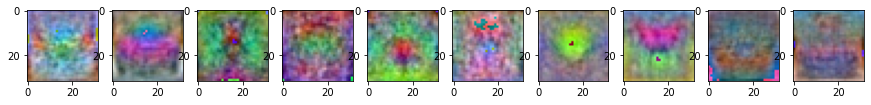

Training Loss: 0.781846352545625


In [14]:
f,ax = plt.subplots(1,10)
f.set_size_inches(15,15)
for i in range(10):
    sample = w[:,i].reshape(32,32,3)
    correctd = 255/(sample.max()-sample.min())*sample+sample.min()*(255/(sample.max()-sample.min()))

    ax[i].imshow((correctd).astype(np.uint8))
plt.show()
print('Training Loss:',loss_history[-1])

In [15]:
batch_size_test = Nte
y_eval =x_test.dot(w)+b
loss_test =1./batch_size_test *np.square(y_eval-y_test).sum()
print('Testing loss:',loss_test)

Testing loss: 0.7870790449106134


In [16]:
acuracy_test = 0
acuracy_train = 0
for yt,yev in zip(y_test,y_eval):
    if np.where(yt == yt.max()) == np.where(yev == yev.max()):
        acuracy_test+=1
for ytr,ypr in zip(y,y_pred):
    if np.where(ytr == ytr.max()) == np.where(ypr == ypr.max()):
        acuracy_train+=1

acuracyRatio = (acuracy_test/batch_size_test)*100
acuracy2 = (acuracy_train/batch_size)*100
print('Accuracy test Presentage', str(acuracyRatio)+'%')
print('Accuracy training Presentage', str(acuracy2)+'%')
    

Accuracy test Presentage 40.57%
Accuracy training Presentage 42.082%


# Question 2

In [17]:
x_t = x_train*255
H = 200
std = 1e-6
w1 = std*np.random.randn(Din,H)
w2 = std*np.random.randn(H,K)
b1 = np.zeros(H)
b2 = np.zeros(K)
lr = 1.4e-2
lr_decay = 0.99
reg = 5e-6
print("w1:",w1.shape)
print("b1:",b1.shape)
print("w2:",w2.shape)
print("b2:",b2.shape)
los_history_2 = []
print("Initial leatning rate" ,lr )

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
Initial leatning rate 0.014


In [18]:

rng = np.random.default_rng(seed=seed)
for i in range(iterations):
    indices = np.random.choice(Ntr,batch_size)
    rng.shuffle(indices)
    x = x_t[indices]
    y = y_train[indices] 
    h = 1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
    y_pred_2 = h.dot(w2)+b2
    loss_2 = 1.0/batch_size*np.square(y_pred_2-y).sum() + reg*((np.sum(w2**2))+np.sum(w1**2))
    los_history_2.append(loss_2)
    if i%10 == 0:
        print('Iteration %d / %d: loss %f'%(i,iterations,loss_2))
    dy_pred_2 = 1.0/batch_size*2.0*(y_pred_2-y)
    dw2 = h.T.dot(dy_pred_2) + reg*w2
    db2 = dy_pred_2.sum(axis=0)
    dh =  dy_pred_2.dot(w2.T)
    dw1 = x.T.dot(dh*h*(1-h))+reg*w1
    db1 = (dh*h*(1-h)).sum(axis=0)
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -= lr*db1
    b2 -= lr*db2
    lr *= lr_decay

Iteration 0 / 300: loss 0.999995
Iteration 10 / 300: loss 0.983513
Iteration 20 / 300: loss 0.856075
Iteration 30 / 300: loss 0.842568
Iteration 40 / 300: loss 0.832038
Iteration 50 / 300: loss 0.825578
Iteration 60 / 300: loss 0.818685
Iteration 70 / 300: loss 0.812147
Iteration 80 / 300: loss 0.811389
Iteration 90 / 300: loss 0.803645
Iteration 100 / 300: loss 0.797573
Iteration 110 / 300: loss 0.793433
Iteration 120 / 300: loss 0.789442
Iteration 130 / 300: loss 0.788426
Iteration 140 / 300: loss 0.784507
Iteration 150 / 300: loss 0.781794
Iteration 160 / 300: loss 0.780001
Iteration 170 / 300: loss 0.778827
Iteration 180 / 300: loss 0.778041
Iteration 190 / 300: loss 0.775066
Iteration 200 / 300: loss 0.773739
Iteration 210 / 300: loss 0.772809
Iteration 220 / 300: loss 0.771664
Iteration 230 / 300: loss 0.770204
Iteration 240 / 300: loss 0.770326
Iteration 250 / 300: loss 0.770707
Iteration 260 / 300: loss 0.769670
Iteration 270 / 300: loss 0.770404
Iteration 280 / 300: loss 0.769

In [19]:

print('Training loss:',los_history_2[-1])


Training loss: 0.7696711114290066


In [20]:
x_test2 = x_test*255
h = 1.0/(1.0+np.exp(-(x_test2.dot(w1)+b1)))
y_eval_2 = h.dot(w2)+b2
loss_2 = 1.0/batch_size_test*np.square(y_eval_2-y_test).sum() 
print(loss_2)

0.7742419288623104


In [21]:
acuracy_test = 0
acuracy_train = 0
for yt,yev in zip(y_test,y_eval_2):
    if np.where(yt == yt.max()) == np.where(yev == yev.max()):
        acuracy_test+=1

for ytr,ypr in zip(y,y_pred_2):
    if np.where(ytr == ytr.max()) == np.where(ypr == ypr.max()):
        acuracy_train+=1

acuracyRatio = (acuracy_test/batch_size_test)*100
acuracy2 = (acuracy_train/batch_size)*100
print('Accuracy test Presentage', str(acuracyRatio)+'%')
print('Accuracy training Presentage', str(acuracy2)+'%')

Accuracy test Presentage 41.46%
Accuracy training Presentage 42.176%


# Question 3

In [22]:
x_t = x_train*255
H = 200
std = 1e-6
w1 = std*np.random.randn(Din,H)
w2 = std*np.random.randn(H,K)
b1 = np.zeros(H)
b2 = np.zeros(K)
lr = 1.4e-2
lr_decay = 0.99
reg = 5e-6
print("w1:",w1.shape)
print("b1:",b1.shape)
print("w2:",w2.shape)
print("b2:",b2.shape)
los_history_2 = []
print("Initial leatning rate" ,lr )

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
Initial leatning rate 0.014


In [23]:
rng = np.random.default_rng(seed=seed)
batch_size = 500
lr = 1.4e-2
for i in range(iterations):
    indices = np.random.choice(Ntr,Ntr)
    rng.shuffle(indices)
    x = x_t[indices]
    y = y_train[indices]
    t= 0
    y = y_train[indices]
    for j in range(100):
        x_ = x[t:t+500]
        y_ = y[t:t+500]
        h = 1.0/(1.0+np.exp(-(x_.dot(w1)+b1)))
        y_pred_2 = h.dot(w2)+b2
        loss_2 = 1.0/batch_size*np.square(y_pred_2-y_).sum() + reg*((np.sum(w2**2))+np.sum(w1**2))
        los_history_2.append(loss_2)
        dy_pred_2 = 1.0/batch_size*2.0*(y_pred_2-y_)
        dw2 = h.T.dot(dy_pred_2) + reg*w2
        db2 = dy_pred_2.sum(axis=0)
        dh =  dy_pred_2.dot(w2.T)
        dw1 = x_.T.dot(dh*h*(1-h))+reg*w1
        db1 = (dh*h*(1-h)).sum(axis=0)
        w1 -= lr*dw1
        w2 -= lr*dw2
        b1 -= lr*db1
        b2 -= lr*db2
        lr *= lr_decay
        t+=500
    if i%10 == 0:
        print('Iteration %d / %d: loss %f'%(i,iterations,loss_2))


Iteration 0 / 300: loss 0.818654
Iteration 10 / 300: loss 0.759929
Iteration 20 / 300: loss 0.781302
Iteration 30 / 300: loss 0.761987
Iteration 40 / 300: loss 0.759452
Iteration 50 / 300: loss 0.770520
Iteration 60 / 300: loss 0.775898
Iteration 70 / 300: loss 0.780764
Iteration 80 / 300: loss 0.777602
Iteration 90 / 300: loss 0.771796
Iteration 100 / 300: loss 0.753236
Iteration 110 / 300: loss 0.767762
Iteration 120 / 300: loss 0.755651
Iteration 130 / 300: loss 0.762877
Iteration 140 / 300: loss 0.762343
Iteration 150 / 300: loss 0.772941
Iteration 160 / 300: loss 0.764954
Iteration 170 / 300: loss 0.778119
Iteration 180 / 300: loss 0.759870
Iteration 190 / 300: loss 0.763303
Iteration 200 / 300: loss 0.774807
Iteration 210 / 300: loss 0.756339
Iteration 220 / 300: loss 0.765268
Iteration 230 / 300: loss 0.760098
Iteration 240 / 300: loss 0.794907
Iteration 250 / 300: loss 0.773515
Iteration 260 / 300: loss 0.761524
Iteration 270 / 300: loss 0.766746
Iteration 280 / 300: loss 0.766

In [24]:
print('Training loss:',los_history_2[-1])

Training loss: 0.7522062285044065


In [25]:
h = 1.0/(1.0+np.exp(-(x_test2.dot(w1)+b1)))
y_eval_2 = h.dot(w2)+b2
loss_2 = 1.0/batch_size_test*np.square(y_eval_2-y_test).sum() 
print(loss_2)

0.7731548437311


In [26]:
acuracy_test = 0
acuracy_train = 0
for yt,yev in zip(y_test,y_eval_2):
    if np.where(yt == yt.max()) == np.where(yev == yev.max()):
        acuracy_test+=1

for ytr,ypr in zip(y,y_pred_2):
    if np.where(ytr == ytr.max()) == np.where(ypr == ypr.max()):
        acuracy_train+=1

acuracyRatio = (acuracy_test/batch_size_test)*100
acuracy2 = (acuracy_train/batch_size)*100
print('Accuracy test Presentage', str(acuracyRatio)+'%')
print('Accuracy training Presentage', str(acuracy2)+'%')

Accuracy test Presentage 41.27%
Accuracy training Presentage 10.2%


# Question 4

In [27]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3) ,activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))
print(model.summary())
print(y_train.shape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [28]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [29]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
opt=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name='sgd')
model.compile(optimizer=opt,loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=10,batch_size=50,validation_split=0.2)


Epoch 1/10
800/800 [==============================] - 63s 51ms/step - loss: 1.7365 - accuracy: 0.3623 - val_loss: 1.5744 - val_accuracy: 0.4211
Epoch 2/10
800/800 [==============================] - 39s 49ms/step - loss: 1.3162 - accuracy: 0.5284 - val_loss: 1.2470 - val_accuracy: 0.5580
Epoch 3/10
800/800 [==============================] - 39s 48ms/step - loss: 1.1448 - accuracy: 0.5945 - val_loss: 1.1644 - val_accuracy: 0.5943
Epoch 4/10
800/800 [==============================] - 41s 52ms/step - loss: 1.0281 - accuracy: 0.6369 - val_loss: 1.1187 - val_accuracy: 0.6095
Epoch 5/10
800/800 [==============================] - 39s 49ms/step - loss: 0.9244 - accuracy: 0.6747 - val_loss: 0.9713 - val_accuracy: 0.6650
Epoch 6/10
800/800 [==============================] - 39s 49ms/step - loss: 0.8439 - accuracy: 0.7025 - val_loss: 0.9436 - val_accuracy: 0.6717
Epoch 7/10
800/800 [==============================] - 34s 42ms/step - loss: 0.7774 - accuracy: 0.7266 - val_loss: 0.9069 - val_accuracy:

In [30]:

test_loss, test_acuracy = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:-",test_loss)
print("Test Accuracy:-", str(test_acuracy*100)+'%')


313/313 - 2s - loss: 1.0173 - accuracy: 0.6762
Test loss:- 1.0172590017318726
Test Accuracy:- 67.61999726295471%
